# Wine Score Prediction | Wine Recommender

***

# Notebook 1: Loading and Cleaning Data
**Steps to load, clean, and analyse the data upon first inspection.**

&nbsp;

**By: Annika Scholl**

**BrainStation Data Science**

This notebook will first define the project's purpose, discussing the reasons for the analysis in the introduction.  Then, it will cover the fundamental steps of loading and cleaning the data, including formatting, handling duplicates and missing values. 


***

## Notebook Contents

1. [**Introduction**](#a1)<br>
    1.1 [Problem Statement](#a1.1)<br>
    1.2 [Data Collection](#a1.2)<br>
    1.3 [Importing Libraries](#a1.3)<br>

2. [**Loading Data & Observe**](#a2)<br>
    
3. [**Data Cleaning**](#a3)<br>
    3.1.[Formate & Validate](#a3.1)<br>
    3.2.[Duplicates](#a3.2)<br>
    3.3.[Missing Values](#a3.3)<br>
        
4. [**Conclusion**](#a4)<br>

***

# Introduction <a id="a1"></a>

**Problem Statement** <a id="a1.1"></a>
 
The project aims to assist wine consumers in selecting their wine. Although wine review websites like Vivino provide ratings, new wines often lack sufficient scores to be considered trustworthy. To address this issue, a **wine score predictor** will be a solution.

However, it is important to note that scores are subjective and can vary from person to person. Therefore, a **wine recommender** that suggests wines based on your favourite wine, matching its taste and flavor is another solution of this project.  

**Data Collection** <a id="a1.2"></a>

The data used in this project was scraped from the website vivino. The setup for the scraping was used by following user [Gugarose](https://github.com/gugarosa/viviner). The scraping code has been modified to scrap small amounts from the website and therefore avoid duplications. The collected data (csv) can be found [here](https://drive.google.com/drive/folders/1GjL5_z6pyaLerbafZw76XsMYZdK5VWIV?usp=sharing).

**Importing Libraries** <a id="a1.3"></a>

The first step is to import the libraries which will be used in this notebook.

In [1]:
# import libraries
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

***

# Loading Data & Oberserve <a id="a2"></a>

Before cleaning the data, I would like to get an overview of the columns and the general shape of the dataset.

In [2]:
# Read data
df = pd.read_csv(f'data/data_raw.csv').iloc[:,1:]

In [3]:
# Dimension of the dataframe
df.shape
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 46647 rows and 24 columns.


In [4]:
# View first 5 rows
df.head().T

,0,1,2,3,4
wine_id,1101361,1186041,1099538,79235,87560
wine_name,Les Poyeux Saumur Champigny,Clos de Tart Grand Cru Monopole,Pomerol,Vosne-Romanée,La Pialade Côtes du Rhône Rouge
winery,Clos Rougeard,Domaine du Clos de Tart,Château Latour à Pomerol,Méo-Camuzet,Château Rayas
year,1992,1959,1929,1993,1999
country,France,France,France,France,France
region,Saumur-Champigny,Clos de Tart Grand Cru,Pomerol,Vosne-Romanée,Côtes-du-Rhône
avg_rating_wine,4.5,4.5,4.3,4.3,4.2
num_rating_wine,2219,5408,7005,2665,1896
avg_rating_wine_year,4.5,4.5,4.3,4.3,4.2
num_rating_wine_year,2219,5408,7005,2665,1896


In [5]:
# Get an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46647 entries, 0 to 46646
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_id               46647 non-null  int64  
 1   wine_name             46647 non-null  object 
 2   winery                46617 non-null  object 
 3   year                  46641 non-null  object 
 4   country               46631 non-null  object 
 5   region                46631 non-null  object 
 6   avg_rating_wine       46647 non-null  float64
 7   num_rating_wine       46647 non-null  int64  
 8   avg_rating_wine_year  46647 non-null  float64
 9   num_rating_wine_year  46647 non-null  int64  
 10  price                 46647 non-null  float64
 11  url                   46647 non-null  object 
 12  volume                46647 non-null  int64  
 13  currency              46647 non-null  object 
 14  body                  45812 non-null  float64
 15  taste_intensity    

In [6]:
# Return a list of columns
df.columns

Index(['wine_id', 'wine_name', 'winery', 'year', 'country', 'region',
       'avg_rating_wine', 'num_rating_wine', 'avg_rating_wine_year',
       'num_rating_wine_year', 'price', 'url', 'volume', 'currency', 'body',
       'taste_intensity', 'taste_tannin', 'taste_sweetness', 'taste_acidity',
       'taste_fizziness', 'grapes', 'flavor', 'food', 'description'],
      dtype='object')

***

**Dataset Introduction**

The dataset include following data points.

- Primary Key: `wine_id` + `year`


| Meta Data | Geographic Data | Monetary Data | Rating Data | Taste Data | Attribute Data |
| --- | --- | --- | --- | --- | --- |
| `wine_id`, `wine_name`, `winery`, `year` | `country`, `region` | `price`, `volume`, `currency` | `avg_rating_wine`, `num_rating_wine`, `avg_rating_wine_year`, `num_rating_wine_year` | `body`, `taste_intensity`, `taste_tannin`, `taste_sweetness`, `taste_acidity`, `taste_fizziness`, `flavor` | `grapes`, `food`, `description`, `url` |


**Data dictionary:**
| column | Description |
| --- | --- |
| `wine_id` | Identifier for the wine |
| `wine_name` | Name of the wine |
| `winery` | Name of the winery producing the wine |
| `year` | Vintage year of the wine |
| `country` | Country where the wine is produced |
| `region` | Specific region within the country where the wine is produced |
| `price` | Price of the wine |
| `volume` | Volume of the wine (in liters) |
| `currency` | Currency used for pricing |
| `avg_rating_wine` | Overall rating of the wine (same wine of different years) |
| `num_rating_wine` | Overall number of ratings of the wine |
| `avg_rating_wine_year` | Specific rating of the wine and year |
| `num_rating_wine_year` | Number of ratings of the wine and year |
| `body` | Body of the wine |
| `taste_intensity` | Intensity of the taste |
| `taste_tannin` | Tannin level |
| `taste_sweetness` | Sweetness level |
| `taste_acidity` | Acidity level |
| `taste_fizziness` | Fizziness level |
| `flavor` | Flavor profile of the wine |
| `grapes` | Types of grapes used in making the wine |
| `food` | Recommended food pairings with the wine |
| `description` | Description or notes about the wine |
| `url` | URL to a distributor of the wine |


***

# Data Cleaning <a id="a3"></a>

In [7]:
# Before starting the cleaning, make a copy
df_clean = df.copy()

## Formate & Validate <a id="a3.1"></a>

The first step of the data cleaning process is to check if every column has the correct formate and data type.

In [8]:
# Check first 5 rows
df_clean.head()

,wine_id,wine_name,winery,year,country,region,avg_rating_wine,num_rating_wine,avg_rating_wine_year,num_rating_wine_year,...,body,taste_intensity,taste_tannin,taste_sweetness,taste_acidity,taste_fizziness,grapes,flavor,food,description
0,1101361,Les Poyeux Saumur Champigny,Clos Rougeard,1992,France,Saumur-Champigny,4.5,2219,4.5,2219,...,3.0,3.250090,3.475009,2.186149,3.935772,NaN,"[{'id': 3, 'name': 'Cabernet Franc', 'seo_name...","[{'group': 'earth', 'stats': {'count': 54, 'sc...","[{'id': 8, 'name': 'Lamb', 'weight': 0.5, 'bac...",NaN
1,1186041,Clos de Tart Grand Cru Monopole,Domaine du Clos de Tart,1959,France,Clos de Tart Grand Cru,4.5,5408,4.5,5408,...,3.0,3.094230,2.708399,1.796174,4.161411,NaN,"[{'id': 14, 'name': 'Pinot Noir', 'seo_name': ...","[{'group': 'red_fruit', 'stats': {'count': 188...","[{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...",NaN
2,1099538,Pomerol,Château Latour à Pomerol,1929,France,Pomerol,4.3,7005,4.3,7005,...,4.0,4.124983,3.436851,1.677245,3.367577,NaN,"[{'id': 2, 'name': 'Cabernet Sauvignon', 'seo_...","[{'group': 'oak', 'stats': {'count': 345, 'sco...","[{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...","Bordeaux Pomerol wines are rich, decadent reds..."
3,79235,Vosne-Romanée,Méo-Camuzet,1993,France,Vosne-Romanée,4.3,2665,4.3,2665,...,3.0,2.965793,2.549722,1.676296,4.049462,NaN,"[{'id': 14, 'name': 'Pinot Noir', 'seo_name': ...","[{'group': 'red_fruit', 'stats': {'count': 85,...","[{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...",NaN
4,87560,La Pialade Côtes du Rhône Rouge,Château Rayas,1999,France,Côtes-du-Rhône,4.2,1896,4.2,1896,...,4.0,3.151294,2.824329,1.805076,3.473748,NaN,"[{'id': 1, 'name': 'Shiraz/Syrah', 'seo_name':...","[{'group': 'red_fruit', 'stats': {'count': 56,...","[{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...","The Southern Rhône is situated in a large, spr..."


In [9]:
# Checking for data types
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46647 entries, 0 to 46646
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_id               46647 non-null  int64  
 1   wine_name             46647 non-null  object 
 2   winery                46617 non-null  object 
 3   year                  46641 non-null  object 
 4   country               46631 non-null  object 
 5   region                46631 non-null  object 
 6   avg_rating_wine       46647 non-null  float64
 7   num_rating_wine       46647 non-null  int64  
 8   avg_rating_wine_year  46647 non-null  float64
 9   num_rating_wine_year  46647 non-null  int64  
 10  price                 46647 non-null  float64
 11  url                   46647 non-null  object 
 12  volume                46647 non-null  int64  
 13  currency              46647 non-null  object 
 14  body                  45812 non-null  float64
 15  taste_intensity    

After checking the first rows and the data types, there are 4 columns which need to be formatted: `year`, `most_used_grapes`, `flavor` and `food`.

### Convert datatype of `year` 


In [10]:
# Check unique values
df_clean['year'].unique()

array(['1992', '1959', '1929', '1993', '1999', '1994', '1996', '1988',
       '1947', '1948', '1989', '2021', '2015', '1974', '1990', '2020',
       '2018', 'N.V.', '2022', '1928', '2019', '2017', '2016', '2011',
       '2007', '2023', '2013', '2014', '2008', '2012', '2005', '2010',
       '1908', '2006', '2000', '2001', '2004', '2002', '2009', '1958',
       '2019.0', '2020.0', '2022.0', '2014.0', '2021.0', '2017.0', nan,
       '2015.0', '2003', '1975', '1940', '1997', '1995', '1978', '1952',
       '2011.0', '2023.0', '2016.0', '2018.0', '2012.0', '1960', '1986',
       '1998', '1942', '1949', '1979', '1945', '1987', '1943', '1983',
       '1985', '1962', '1981', '1970', '1991', '1967', '1920', '1976',
       '1980', '1982', '2005.0', '2013.0', '2010.0', '2008.0', '2000.0',
       '1998.0', '1994.0', '1976.0', '1967.0', '2003.0', '2009.0',
       '1999.0', '1995.0', '2007.0', '1966', '1969', '1984', '1972',
       '1968', '2002.0', '1997.0', '2006.0', '1981.0', '1960.0', '1983.0',
 

In [11]:
df_clean[df_clean['year'] == 'N.V.'].shape

(36, 24)

In [12]:
df_clean[df_clean['year'] == 'N.V.'].head()

,wine_id,wine_name,winery,year,country,region,avg_rating_wine,num_rating_wine,avg_rating_wine_year,num_rating_wine_year,...,body,taste_intensity,taste_tannin,taste_sweetness,taste_acidity,taste_fizziness,grapes,flavor,food,description
20,1846964,Cabernet Sauvignon Alcohol Free,Eisberg,N.V.,United Kingdom,England,2.4,127,2.4,127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'group': 'red_fruit', 'stats': {'count': 4, ...",NaN,NaN
164,2574514,Original,Vieux Papes,N.V.,France,Vin de France,3.3,8638,3.3,8638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'group': 'red_fruit', 'stats': {'count': 25,...",NaN,NaN
409,6266660,Mucho Más Tinto,Félix Solís,N.V.,Spain,Vino de España,4.2,72177,4.2,72177,...,4.0,3.780111,2.790106,2.709137,2.620192,NaN,"[{'id': 8, 'name': 'Grenache', 'seo_name': 'gr...","[{'group': 'oak', 'stats': {'count': 933, 'sco...","[{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...",Spain is one of the largest wine producing cou...
821,6188701,The Rambler Red,Boutinot,N.V.,Italy,Piemonte,2.9,243,2.9,243,...,3.0,3.311428,2.540000,1.780000,3.382857,NaN,"[{'id': 31, 'name': 'Barbera', 'seo_name': 'ba...","[{'group': 'red_fruit', 'stats': {'count': 7, ...","[{'id': 5, 'name': 'Pasta', 'weight': 0, 'back...",Barbera is the hardy staple grape of the famou...
956,8511896,Red Blend,Jam Shed,N.V.,Australia,South Australia,3.8,376,3.8,375,...,3.0,4.528667,3.363238,3.071000,3.020762,NaN,NaN,"[{'group': 'black_fruit', 'stats': {'count': 3...","[{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...",NaN


Since the year is part of the key identifier (primary key), I will drop the columns which do not have a year.

In [13]:
# Find indices of rows where 'year' column contains 'nan' or 'N.V.'
indices_to_drop = df_clean[df_clean['year'].isin(['N.V.'])].index

# Drop those rows
df_clean.drop(indices_to_drop, inplace = True)

In [14]:
df_clean['year'].unique()

array(['1992', '1959', '1929', '1993', '1999', '1994', '1996', '1988',
       '1947', '1948', '1989', '2021', '2015', '1974', '1990', '2020',
       '2018', '2022', '1928', '2019', '2017', '2016', '2011', '2007',
       '2023', '2013', '2014', '2008', '2012', '2005', '2010', '1908',
       '2006', '2000', '2001', '2004', '2002', '2009', '1958', '2019.0',
       '2020.0', '2022.0', '2014.0', '2021.0', '2017.0', nan, '2015.0',
       '2003', '1975', '1940', '1997', '1995', '1978', '1952', '2011.0',
       '2023.0', '2016.0', '2018.0', '2012.0', '1960', '1986', '1998',
       '1942', '1949', '1979', '1945', '1987', '1943', '1983', '1985',
       '1962', '1981', '1970', '1991', '1967', '1920', '1976', '1980',
       '1982', '2005.0', '2013.0', '2010.0', '2008.0', '2000.0', '1998.0',
       '1994.0', '1976.0', '1967.0', '2003.0', '2009.0', '1999.0',
       '1995.0', '2007.0', '1966', '1969', '1984', '1972', '1968',
       '2002.0', '1997.0', '2006.0', '1981.0', '1960.0', '1983.0',
       '2

In [15]:
df_clean[df_clean['year'].isnull()]

,wine_id,wine_name,winery,year,country,region,avg_rating_wine,num_rating_wine,avg_rating_wine_year,num_rating_wine_year,...,body,taste_intensity,taste_tannin,taste_sweetness,taste_acidity,taste_fizziness,grapes,flavor,food,description
2586,2463734,Familiemoord,BLANKbottle,NaN,South Africa,Western Cape,4.0,290,4.0,289,...,4.0,3.549561,3.290220,2.302078,3.371605,NaN,NaN,"[{'group': 'red_fruit', 'stats': {'count': 38,...","[{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...",NaN
8882,1538327,Echappée Bel Bordeaux Rouge,Château de Bel,NaN,France,Bordeaux,3.5,406,3.5,406,...,4.0,3.927212,3.747993,1.384015,3.777101,NaN,"[{'id': 2, 'name': 'Cabernet Sauvignon', 'seo_...","[{'group': 'oak', 'stats': {'count': 16, 'scor...","[{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...","Bordeaux has a cool marine coastal climate, wi..."
21006,1130386,La Fiole du Pape Père Anselme Châteauneuf-du-Pape,Brotte,NaN,France,Châteauneuf-du-Pape,4.1,26831,4.1,26831,...,5.0,4.456184,2.755036,1.657131,3.017371,NaN,"[{'id': 1, 'name': 'Shiraz/Syrah', 'seo_name':...","[{'group': 'oak', 'stats': {'count': 723, 'sco...","[{'id': 8, 'name': 'Lamb', 'weight': 0.5, 'bac...",NaN
22948,5364329,Cinque Autoctoni Collection Limited Release,Fantini,NaN,Italy,Abruzzo,4.4,4754,4.4,4754,...,3.0,3.569397,2.803807,2.043741,2.916741,NaN,"[{'id': 16, 'name': 'Sangiovese', 'seo_name': ...","[{'group': 'oak', 'stats': {'count': 221, 'sco...","[{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...",Central Italy is a red wine wonderland with an...
28317,1361944,Saldo Zinfandel,The Prisoner,NaN,United States,California,4.2,35563,4.2,35563,...,5.0,4.859155,2.427897,2.581658,1.760910,NaN,"[{'id': 21, 'name': 'Zinfandel', 'seo_name': '...","[{'group': 'oak', 'stats': {'count': 2045, 'sc...","[{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...",Zinfandel has flourished in California since t...
44291,77136,Unico Reserva Especial Edición,Vega Sicilia,NaN,Spain,Ribera del Duero,4.7,13714,4.7,13713,...,5.0,3.853530,3.477108,1.830320,3.674867,NaN,"[{'id': 19, 'name': 'Tempranillo', 'seo_name':...","[{'group': 'oak', 'stats': {'count': 275, 'sco...","[{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...","Rioja may be the most famous region in Spain, ..."


Since the year is part of the key identifier (primary key), I will drop the columns which do not have a year.

In [16]:
# Drop that row
df_clean.dropna(axis = 0, subset = 'year', inplace = True)

In [17]:
df_clean['year'].unique()

array(['1992', '1959', '1929', '1993', '1999', '1994', '1996', '1988',
       '1947', '1948', '1989', '2021', '2015', '1974', '1990', '2020',
       '2018', '2022', '1928', '2019', '2017', '2016', '2011', '2007',
       '2023', '2013', '2014', '2008', '2012', '2005', '2010', '1908',
       '2006', '2000', '2001', '2004', '2002', '2009', '1958', '2019.0',
       '2020.0', '2022.0', '2014.0', '2021.0', '2017.0', '2015.0', '2003',
       '1975', '1940', '1997', '1995', '1978', '1952', '2011.0', '2023.0',
       '2016.0', '2018.0', '2012.0', '1960', '1986', '1998', '1942',
       '1949', '1979', '1945', '1987', '1943', '1983', '1985', '1962',
       '1981', '1970', '1991', '1967', '1920', '1976', '1980', '1982',
       '2005.0', '2013.0', '2010.0', '2008.0', '2000.0', '1998.0',
       '1994.0', '1976.0', '1967.0', '2003.0', '2009.0', '1999.0',
       '1995.0', '2007.0', '1966', '1969', '1984', '1972', '1968',
       '2002.0', '1997.0', '2006.0', '1981.0', '1960.0', '1983.0',
       '2004.0

In [18]:
# Convert year to an integer
df_clean['year'] = df_clean['year'].astype(float)
df_clean['year'] = df_clean['year'].astype(int)

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46646
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_id               46605 non-null  int64  
 1   wine_name             46605 non-null  object 
 2   winery                46575 non-null  object 
 3   year                  46605 non-null  int64  
 4   country               46589 non-null  object 
 5   region                46589 non-null  object 
 6   avg_rating_wine       46605 non-null  float64
 7   num_rating_wine       46605 non-null  int64  
 8   avg_rating_wine_year  46605 non-null  float64
 9   num_rating_wine_year  46605 non-null  int64  
 10  price                 46605 non-null  float64
 11  url                   46605 non-null  object 
 12  volume                46605 non-null  int64  
 13  currency              46605 non-null  object 
 14  body                  45776 non-null  float64
 15  taste_intensity       45

### Set new index

In [20]:
# Check how many unique wine ids in combination with year
df_clean.shape[0] == df_clean.groupby(['wine_id', 'year']).ngroups

True

In [21]:
df_clean['index'] = df_clean.apply(lambda x: f"{x['wine_id']}_{x['year']}", axis=1)
df_clean.set_index('index', inplace=True)

### Drop `grapes`


This thThe grapes are formatted differently, so I will save them in a separate CSV file to work with them later.

In [22]:
df_clean['grapes'].head()

index
1101361_1992    [{'id': 3, 'name': 'Cabernet Franc', 'seo_name...
1186041_1959    [{'id': 14, 'name': 'Pinot Noir', 'seo_name': ...
1099538_1929    [{'id': 2, 'name': 'Cabernet Sauvignon', 'seo_...
79235_1993      [{'id': 14, 'name': 'Pinot Noir', 'seo_name': ...
87560_1999      [{'id': 1, 'name': 'Shiraz/Syrah', 'seo_name':...
Name: grapes, dtype: object

In [23]:
grapes_df = df_clean['grapes']

In [24]:
# save a csv 
grapes_df.to_csv('data/grapes_df.csv')

In [25]:
# Drop food column from df_clean
df_clean.drop(columns= 'grapes', inplace = True)

### Create new dataframe `food`


In [26]:
# Look at an example row
df_clean['food'].head()

index
1101361_1992    [{'id': 8, 'name': 'Lamb', 'weight': 0.5, 'bac...
1186041_1959    [{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...
1099538_1929    [{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...
79235_1993      [{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...
87560_1999      [{'id': 4, 'name': 'Beef', 'weight': 0.5, 'bac...
Name: food, dtype: object

In [27]:
# Create an empty dataframe for food data
food_df = df_clean[[]].copy()
food_df.head()

""
index
1101361_1992
1186041_1959
1099538_1929
79235_1993
87560_1999


In [28]:
# Food list from vivino.com
food_list = ['Junk food', 'Aperitif', 'Appetizers', 'Beef', 'Blue cheese', 'Cured Meat', 'Fruity dessert', 'Game', 'Goat cheese', 'Lamb', 'Lean fish', 'Mature and hard cheese', 'Mild and soft cheese', 'Mushrooms', 'Pasta', 'Pork', 'Poultry', 'Rich fish', 'Shellfish', 'Spicy food', 'Sweet dessert', 'Veal']

# Check if the wine contains the food
for food in food_list:
    food_df.loc[:, food] = df_clean['food'].str.contains(food).fillna(False)

food_df.head()

,Junk food,Aperitif,Appetizers,Beef,Blue cheese,Cured Meat,Fruity dessert,Game,Goat cheese,Lamb,...,Mild and soft cheese,Mushrooms,Pasta,Pork,Poultry,Rich fish,Shellfish,Spicy food,Sweet dessert,Veal
index,,,,,,,,,,,,,,,,,,,,,
1101361_1992,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1186041_1959,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
1099538_1929,False,False,False,True,False,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
79235_1993,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
87560_1999,False,False,False,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [29]:
food_df.sum()

Junk food                     0
Aperitif                      0
Appetizers                   55
Beef                      42874
Blue cheese                 730
Cured Meat                 3390
Fruity dessert                0
Game                      31918
Goat cheese                   0
Lamb                      30519
Lean fish                    22
Mature and hard cheese     1067
Mild and soft cheese        280
Mushrooms                  1055
Pasta                     11634
Pork                       3114
Poultry                   31445
Rich fish                    29
Shellfish                     0
Spicy food                   69
Sweet dessert                 0
Veal                      18652
dtype: int64

In [30]:
# save a csv 
food_df.to_csv('data/food_df.csv')

In [31]:
# Drop food column from df_clean
df_clean.drop(columns= 'food', inplace = True)

### Create new dataframe `flavor`

In [32]:
flavor = df_clean['flavor']

In [33]:
# save a csv 
flavor.to_csv('data/flavor_df.csv')

In [34]:
#Drop flavor column from df_clean
df_clean.drop(columns= 'flavor', inplace = True)

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 1101361_1992 to 99974_1997
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_id               46605 non-null  int64  
 1   wine_name             46605 non-null  object 
 2   winery                46575 non-null  object 
 3   year                  46605 non-null  int64  
 4   country               46589 non-null  object 
 5   region                46589 non-null  object 
 6   avg_rating_wine       46605 non-null  float64
 7   num_rating_wine       46605 non-null  int64  
 8   avg_rating_wine_year  46605 non-null  float64
 9   num_rating_wine_year  46605 non-null  int64  
 10  price                 46605 non-null  float64
 11  url                   46605 non-null  object 
 12  volume                46605 non-null  int64  
 13  currency              46605 non-null  object 
 14  body                  45776 non-null  float64
 15  taste_in

## Duplicates <a id="a3.2"></a>

The next step of the data cleaning is to look at duplicates. 

In [36]:
df_clean.duplicated().sum()

0

There are no duplicates in this dataset. 

## Missing values <a id="a3.3"></a>

In [37]:
# Check for missing values
df_clean.isna().sum()

wine_id                     0
wine_name                   0
winery                     30
year                        0
country                    16
region                     16
avg_rating_wine             0
num_rating_wine             0
avg_rating_wine_year        0
num_rating_wine_year        0
price                       0
url                         0
volume                      0
currency                    0
body                      829
taste_intensity           829
taste_tannin              829
taste_sweetness           829
taste_acidity             829
taste_fizziness         46605
description             20057
dtype: int64

In [38]:
# percentage of null values
df_clean.isna().sum()/df_clean.shape[0]

wine_id                 0.000000
wine_name               0.000000
winery                  0.000644
year                    0.000000
country                 0.000343
region                  0.000343
avg_rating_wine         0.000000
num_rating_wine         0.000000
avg_rating_wine_year    0.000000
num_rating_wine_year    0.000000
price                   0.000000
url                     0.000000
volume                  0.000000
currency                0.000000
body                    0.017788
taste_intensity         0.017788
taste_tannin            0.017788
taste_sweetness         0.017788
taste_acidity           0.017788
taste_fizziness         1.000000
description             0.430362
dtype: float64

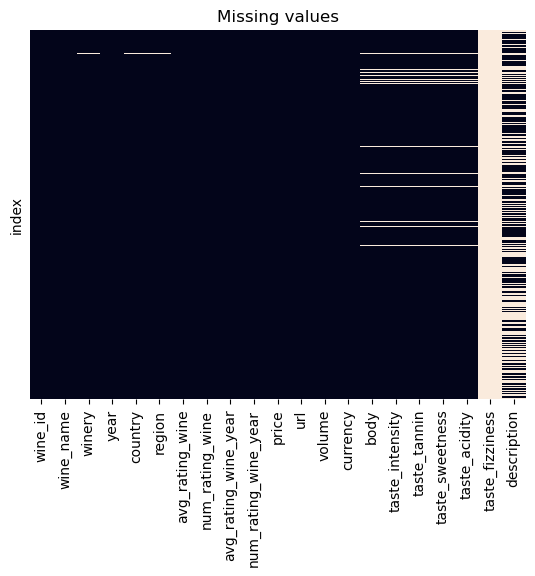

In [39]:
sns.heatmap(df_clean.isnull(), yticklabels=False, cbar=False)
plt.title('Missing values')
plt.show()

The dataset has some missing values in following columns: `taste_data`, `winery`and `description`. The following is handling the missing values.

### Missing `taste_data`


#### `taste_fizziness`

Since red wine is not fizzy, all values are 0. There are two option how to handle this missing value:
- Option 1: Keep column and value = 0 
- Option 2: Delete column

When compared red wine to other wines, this column might get more important. Therefore I am going to keep it and fill the missing values with 0.

In [40]:
# Option 1
df_clean.fillna({'taste_fizziness': 0}, inplace = True)

In [41]:
# Option 2
# df_clean.drop(['taste_fizziness'], axis = 1)

In [42]:
df_clean.isna().sum()

wine_id                     0
wine_name                   0
winery                     30
year                        0
country                    16
region                     16
avg_rating_wine             0
num_rating_wine             0
avg_rating_wine_year        0
num_rating_wine_year        0
price                       0
url                         0
volume                      0
currency                    0
body                      829
taste_intensity           829
taste_tannin              829
taste_sweetness           829
taste_acidity             829
taste_fizziness             0
description             20057
dtype: int64

#### `taste_others`
Check why the taste factors are null. As you can see from the heatmap, all the null values are in the same row.

In [43]:
df_clean[df_clean['taste_intensity'].isnull()]

,wine_id,wine_name,winery,year,country,region,avg_rating_wine,num_rating_wine,avg_rating_wine_year,num_rating_wine_year,...,url,volume,currency,body,taste_intensity,taste_tannin,taste_sweetness,taste_acidity,taste_fizziness,description
index,,,,,,,,,,,,,,,,,,,,,
1457523_1947,1457523,Rouge,Paul Bouchard et Cie,1947,France,Vin de France,0.0,7,0.0,0,...,https://www.sodivin.com/10187-paul-bouchard-ci...,750,GBP,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3312880_2020,3312880,Pinot Noir,Doudet Naudin,2020,France,Vin de France,3.7,2905,3.8,446,...,https://crsfw.com/product/pinot-noir-by-doudet...,750,GBP,NaN,NaN,NaN,NaN,NaN,0.0,NaN
10986_2021,10986,Rouge,La Vieille Ferme,2021,France,Vin de France,3.5,38333,3.7,1707,...,https://stillwine.de/collections/rotwein/produ...,750,GBP,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4258944_2023,4258944,Rouge,Cantoiseau,2023,France,Vin de France,3.6,162,3.6,162,...,https://www.thewinesociety.com/product/cantois...,750,GBP,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1213753_2016,1213753,La Petite Perrière Pinot Noir,La Perrière,2016,France,Vin de France,3.5,7967,3.5,1050,...,http://www.vinsmoinschers.com/produit_autres%2...,750,GBP,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596006_2021,2596006,Violette Red Blend,Pizzato,2021,Brazil,Serra Gaúcha,3.2,1622,3.2,1622,...,https://crsfw.com/product/violette-14528274,750,GBP,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2188115_2021,2188115,Historical XIXth Century Wine,Chateau Palmer,2021,France,Vin de France,4.4,902,4.4,902,...,https://nickollsandperks.com/p/2021-chateau-pa...,750,GBP,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2188115_2019,2188115,Historical XIXth Century Wine,Chateau Palmer,2019,France,Vin de France,4.4,902,4.5,34,...,https://tanners-wines-ltd.myshopify.com/produc...,750,GBP,NaN,NaN,NaN,NaN,NaN,0.0,NaN


Since the taste factors are empty in all of the rows, I am going to drop them. 

In [44]:
# Drop missing taste rows
df_clean.dropna(axis = 0, subset = 'taste_intensity', inplace = True)

In [45]:
df_clean.isna().sum()

wine_id                     0
wine_name                   0
winery                     18
year                        0
country                     1
region                      1
avg_rating_wine             0
num_rating_wine             0
avg_rating_wine_year        0
num_rating_wine_year        0
price                       0
url                         0
volume                      0
currency                    0
body                        0
taste_intensity             0
taste_tannin                0
taste_sweetness             0
taste_acidity               0
taste_fizziness             0
description             19228
dtype: int64

### Missing `winery`

In [46]:
df_clean[df_clean['winery'].isnull()]

,wine_id,wine_name,winery,year,country,region,avg_rating_wine,num_rating_wine,avg_rating_wine_year,num_rating_wine_year,...,url,volume,currency,body,taste_intensity,taste_tannin,taste_sweetness,taste_acidity,taste_fizziness,description
index,,,,,,,,,,,,,,,,,,,,,
10091_2022,10091,Schiava Grigia,NaN,2022,Italy,Südtirol - Alto Adige,0.0,3,0.0,0,...,https://vinitop.it/schiava-grigia,750,GBP,4.0,4.000000,3.000000,1.500000,2.000000,0.0,The wines of Northern Italy include some of th...
4719107_2021,4719107,Cannonberg Cabernet Sauvignon,NaN,2021,South Africa,Western Cape,3.9,41,3.9,41,...,http://www.aduv.co.uk/collections/red/products...,750,GBP,4.0,4.520682,3.505682,1.000000,4.000000,0.0,The South African wine industry has pushed to ...
1101212_2015,1101212,Terre de Mons,NaN,2015,France,Bordeaux,0.0,2,0.0,0,...,https://crsfw.com/product/tour-mons-14483631,375,GBP,4.0,4.000000,4.000000,1.000000,4.000000,0.0,"Bordeaux has a cool marine coastal climate, wi..."
1101212_2020,1101212,Terre de Mons,NaN,2020,France,Bordeaux,0.0,2,0.0,0,...,https://crsfw.com/product/tour-mons-14514437,750,GBP,4.0,4.000000,4.000000,1.000000,4.000000,0.0,"Bordeaux has a cool marine coastal climate, wi..."
1101212_2019,1101212,Terre de Mons,NaN,2019,France,Bordeaux,0.0,2,0.0,0,...,https://crsfw.com/product/tour-mons-14514438,750,GBP,4.0,4.000000,4.000000,1.000000,4.000000,0.0,"Bordeaux has a cool marine coastal climate, wi..."
1101212_2016,1101212,Terre de Mons,NaN,2016,France,Bordeaux,0.0,2,0.0,0,...,https://crsfw.com/product/tour-mons-14514440,750,GBP,4.0,4.000000,4.000000,1.000000,4.000000,0.0,"Bordeaux has a cool marine coastal climate, wi..."
2035657_2020,2035657,La Font du Loup Vacqueyras,NaN,2020,France,Vacqueyras,3.8,108,3.9,33,...,https://www.lebendigeweine.de/dourea-vacqueyra...,750,GBP,4.0,4.052206,3.572059,1.783824,3.601103,0.0,"The Southern Rhône is situated in a large, spr..."
2035657_2021,2035657,La Font du Loup Vacqueyras,NaN,2021,France,Vacqueyras,3.8,108,3.8,108,...,https://www.lebendigeweine.de/vacqueyras-rouge...,750,GBP,4.0,4.052206,3.572059,1.783824,3.601103,0.0,"The Southern Rhône is situated in a large, spr..."
1389582_2011,1389582,Millicent Road Shiraz,NaN,2011,Australia,South Australia,3.6,48,3.6,48,...,https://colombiervinsfins.co.uk/wine/shiraz-mi...,750,GBP,5.0,5.000000,3.359460,1.749189,3.081081,0.0,NaN


If the winery is missing, I am going to fill it with unknown.

In [47]:
df_clean.fillna({'winery': 'unknown'}, inplace = True)

In [48]:
df_clean.isna().sum()

wine_id                     0
wine_name                   0
winery                      0
year                        0
country                     1
region                      1
avg_rating_wine             0
num_rating_wine             0
avg_rating_wine_year        0
num_rating_wine_year        0
price                       0
url                         0
volume                      0
currency                    0
body                        0
taste_intensity             0
taste_tannin                0
taste_sweetness             0
taste_acidity               0
taste_fizziness             0
description             19228
dtype: int64

### Missing `country`

In [49]:
df_clean[df_clean['country'].isnull()]

,wine_id,wine_name,winery,year,country,region,avg_rating_wine,num_rating_wine,avg_rating_wine_year,num_rating_wine_year,...,url,volume,currency,body,taste_intensity,taste_tannin,taste_sweetness,taste_acidity,taste_fizziness,description
index,,,,,,,,,,,,,,,,,,,,,
5261714_2019,5261714,Cadalso Sierra de Gredos,Península Vinicultores,2019,NaN,NaN,3.5,1122,3.9,65,...,https://winesquare.co.uk/products/2019-sierra-...,750,GBP,5.0,3.782427,2.993549,1.569347,3.247835,0.0,While once being the 2nd most planted grape in...


Research on the wine shows that it is from Spain, Madrid. Therefore I am going to fill it with the information.
[vivino](https://www.vivino.com/GB/en/peninsula-vinicultores-cadalso-sierra-de-gredos/w/5261714)

In [50]:
df_clean.fillna({'country': 'Spain'}, inplace = True)
df_clean.fillna({'region': 'Madrid'}, inplace = True)

### Missing `description`

In [51]:
df_clean[df_clean['description'].isnull()]

,wine_id,wine_name,winery,year,country,region,avg_rating_wine,num_rating_wine,avg_rating_wine_year,num_rating_wine_year,...,url,volume,currency,body,taste_intensity,taste_tannin,taste_sweetness,taste_acidity,taste_fizziness,description
index,,,,,,,,,,,,,,,,,,,,,
1101361_1992,1101361,Les Poyeux Saumur Champigny,Clos Rougeard,1992,France,Saumur-Champigny,4.5,2219,4.5,2219,...,https://www.sodivin.com/clos-rougeard/10184-cl...,1500,GBP,3.0,3.250090,3.475009,2.186149,3.935772,0.0,NaN
1186041_1959,1186041,Clos de Tart Grand Cru Monopole,Domaine du Clos de Tart,1959,France,Clos de Tart Grand Cru,4.5,5408,4.5,5408,...,https://www.sodivin.com/mommessin/8711-mommess...,750,GBP,3.0,3.094230,2.708399,1.796174,4.161411,0.0,NaN
79235_1993,79235,Vosne-Romanée,Méo-Camuzet,1993,France,Vosne-Romanée,4.3,2665,4.3,2665,...,https://www.sodivin.com/meo-camuzet-domaine/12...,750,GBP,3.0,2.965793,2.549722,1.676296,4.049462,0.0,NaN
84732_1948,84732,Clos des Lambrays Grand Cru,Domaine des Lambrays,1948,France,Clos de Lambrays Grand Cru,4.4,6920,4.4,6919,...,https://www.sodivin.com/lambrays-domaine-des/1...,750,GBP,3.0,2.967839,2.652266,1.742012,4.182754,0.0,NaN
4541803_2015,4541803,Pinot Crni,Vina Antunović,2015,Croatia,Slavonija,0.0,21,0.0,3,...,https://www.wineandmore.com/wines/antunovic-pi...,750,GBP,4.0,4.000000,3.000000,1.000000,3.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83917_1997,83917,Échezeaux Grand Cru,Domaine de La Romanée-Conti,1997,France,Échezeaux Grand Cru,4.7,5579,4.6,104,...,https://crsfw.com/product/echezeaux-by-drc-145...,750,GBP,3.0,3.027495,2.599994,1.988635,4.116240,0.0,NaN
1622488_2010,1622488,Bonnes-Mares Grand Cru,Domaine G. Roumier,2010,France,Bonnes-Mares Grand Cru,4.6,1508,4.6,32,...,https://nickollsandperks.com/p/2010-bonnes-mar...,750,GBP,3.0,3.136226,2.750154,2.097990,4.158022,0.0,NaN
1513469_2016,1513469,Vosne-Romanée 1er Cru 'Au Cros Parantoux',Méo-Camuzet,2016,France,Vosne-Romanée 1er Cru 'Au Cros Parantoux',4.5,355,4.5,355,...,https://crsfw.com/product/vosne-romanee-cros-p...,750,GBP,3.0,3.127971,2.633320,2.243445,4.099914,0.0,NaN


In [52]:
#Categorise unknow to missing descriptions
df_clean.fillna({'description': 'unknown'}, inplace = True)

In [53]:
df_clean.isna().sum()

wine_id                 0
wine_name               0
winery                  0
year                    0
country                 0
region                  0
avg_rating_wine         0
num_rating_wine         0
avg_rating_wine_year    0
num_rating_wine_year    0
price                   0
url                     0
volume                  0
currency                0
body                    0
taste_intensity         0
taste_tannin            0
taste_sweetness         0
taste_acidity           0
taste_fizziness         0
description             0
dtype: int64

In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45776 entries, 1101361_1992 to 99974_1997
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_id               45776 non-null  int64  
 1   wine_name             45776 non-null  object 
 2   winery                45776 non-null  object 
 3   year                  45776 non-null  int64  
 4   country               45776 non-null  object 
 5   region                45776 non-null  object 
 6   avg_rating_wine       45776 non-null  float64
 7   num_rating_wine       45776 non-null  int64  
 8   avg_rating_wine_year  45776 non-null  float64
 9   num_rating_wine_year  45776 non-null  int64  
 10  price                 45776 non-null  float64
 11  url                   45776 non-null  object 
 12  volume                45776 non-null  int64  
 13  currency              45776 non-null  object 
 14  body                  45776 non-null  float64
 15  taste_in

In [55]:
df_clean.head()

,wine_id,wine_name,winery,year,country,region,avg_rating_wine,num_rating_wine,avg_rating_wine_year,num_rating_wine_year,...,url,volume,currency,body,taste_intensity,taste_tannin,taste_sweetness,taste_acidity,taste_fizziness,description
index,,,,,,,,,,,,,,,,,,,,,
1101361_1992,1101361,Les Poyeux Saumur Champigny,Clos Rougeard,1992,France,Saumur-Champigny,4.5,2219,4.5,2219,...,https://www.sodivin.com/clos-rougeard/10184-cl...,1500,GBP,3.0,3.250090,3.475009,2.186149,3.935772,0.0,unknown
1186041_1959,1186041,Clos de Tart Grand Cru Monopole,Domaine du Clos de Tart,1959,France,Clos de Tart Grand Cru,4.5,5408,4.5,5408,...,https://www.sodivin.com/mommessin/8711-mommess...,750,GBP,3.0,3.094230,2.708399,1.796174,4.161411,0.0,unknown
1099538_1929,1099538,Pomerol,Château Latour à Pomerol,1929,France,Pomerol,4.3,7005,4.3,7005,...,https://www.sodivin.com/latour-a-pomerol/8760-...,750,GBP,4.0,4.124983,3.436851,1.677245,3.367577,0.0,"Bordeaux Pomerol wines are rich, decadent reds..."
79235_1993,79235,Vosne-Romanée,Méo-Camuzet,1993,France,Vosne-Romanée,4.3,2665,4.3,2665,...,https://www.sodivin.com/meo-camuzet-domaine/12...,750,GBP,3.0,2.965793,2.549722,1.676296,4.049462,0.0,unknown
87560_1999,87560,La Pialade Côtes du Rhône Rouge,Château Rayas,1999,France,Côtes-du-Rhône,4.2,1896,4.2,1896,...,https://www.sodivin.com/rayas/8011-rayas-rouge...,750,GBP,4.0,3.151294,2.824329,1.805076,3.473748,0.0,"The Southern Rhône is situated in a large, spr..."


In [56]:
df_clean.to_csv('data/data_clean.csv')

***

# Conclusion <a id="a4"></a>

This notebook includes the initial data loading and observation, as well as data cleaning to ensure high-quality data for analysis and processing.  

**Next Steps:**

The next step is to perform exploratory data analysis to examine the data in more detail. See Notebook *2-EDA*.

